In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32
version = 3

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
%cd /content/drive/MyDrive/Dataset/chicken_breed_recognizer

/content/drive/MyDrive/Dataset/chicken_breed_recognizer


In [ ]:
data_path = 'data'

# Fetching data

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3688) [Path('data/Austra White chicken/eab33c1e-d795-4489-b711-88fe57449bdf.jpg'),Path('data/Austra White chicken/5c885fe8-f991-4628-8e0d-429b2421d615.jpg'),Path('data/Austra White chicken/fea6ccb1-cfc9-41c8-8dd8-351655fc4087.jpg'),Path('data/Austra White chicken/83ebc27b-72cf-4705-8c1b-c2ca4c8bb00a.JPG'),Path('data/Austra White chicken/5608fd97-5ff4-4ad0-93fd-49f54f569dda.jpg'),Path('data/Austra White chicken/8c7fcaf4-0e1e-4c6d-b1f8-4c93491a5130.jpg'),Path('data/Austra White chicken/6489e144-a30b-416c-bffd-c9dec9e7013e.jpg'),Path('data/Austra White chicken/01a8c60d-2796-40ae-9792-5c05ab97ba20.jpg'),Path('data/Austra White chicken/628455eb-3a26-4b5a-8ccd-e98abc9cf18d.jpg'),Path('data/Austra White chicken/fd7f378a-5836-4c03-840e-c2346c03864a.jpg')...]

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs=bs)
torch.save(dls, f"cap_dataloader_v{version}.pkl")

In [ ]:
# dls = torch.load('dataloaders/chicken_breeds_dataloader_{version}.pkl')

In [ ]:
dls.to(device)

In [ ]:
model_path = 'models'

In [ ]:
if not os.path.exists(model_path):
    os.mkdir(model_path)

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.to(device)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
model.load(f"chicken_breed_recognizer-v{version-1}")

In [ ]:
model.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
model.save(f"chicken_breed_recognizer-v{version}")

Path('models/chicken_breed_recognizer-v3.pth')

In [ ]:
# model = model.load(f"chicken_breed_recognizer-v{version}")

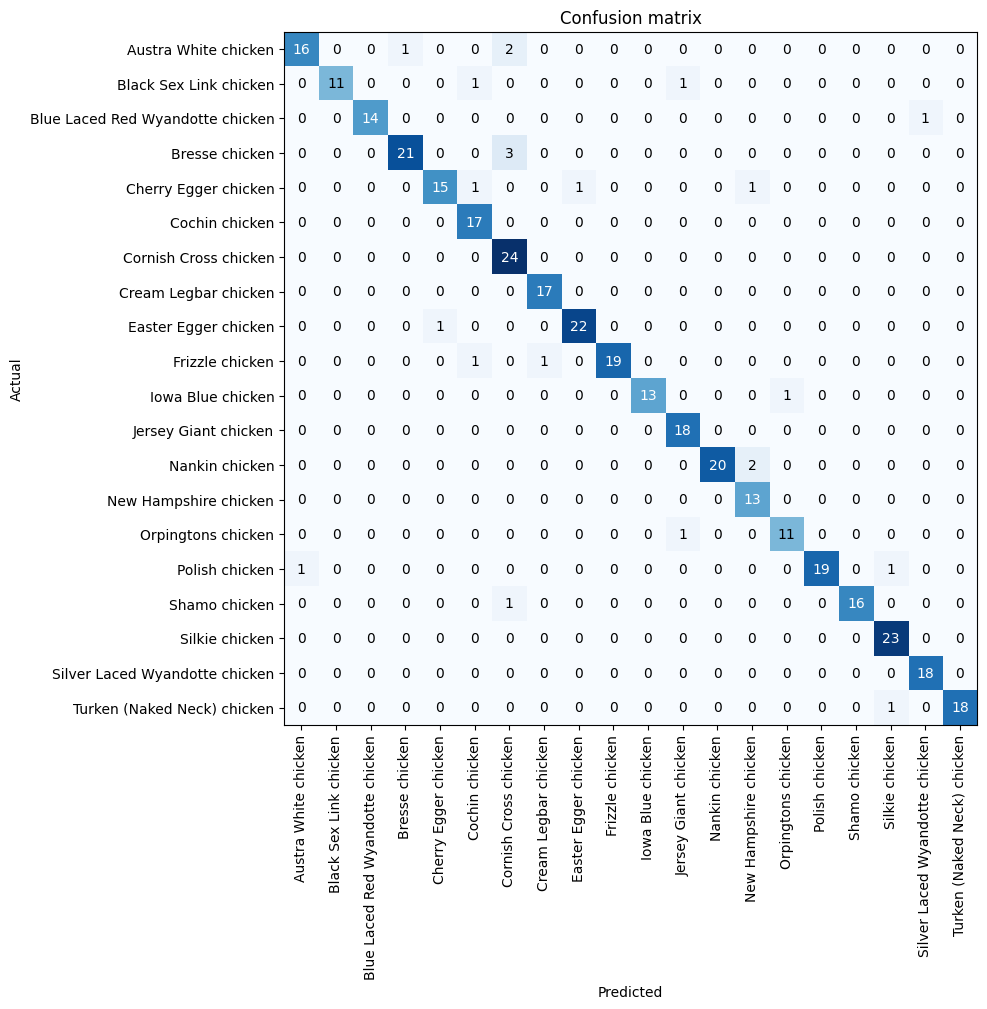

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(10, 10)) # coching, cherry egger, easter egger, jersey giant, nankin, new hampshire, orpingtons, 

### Most problems: cochin, breese, cherry egger, easter egger, jersey giant, nankin, new hampshire, orpingtons,

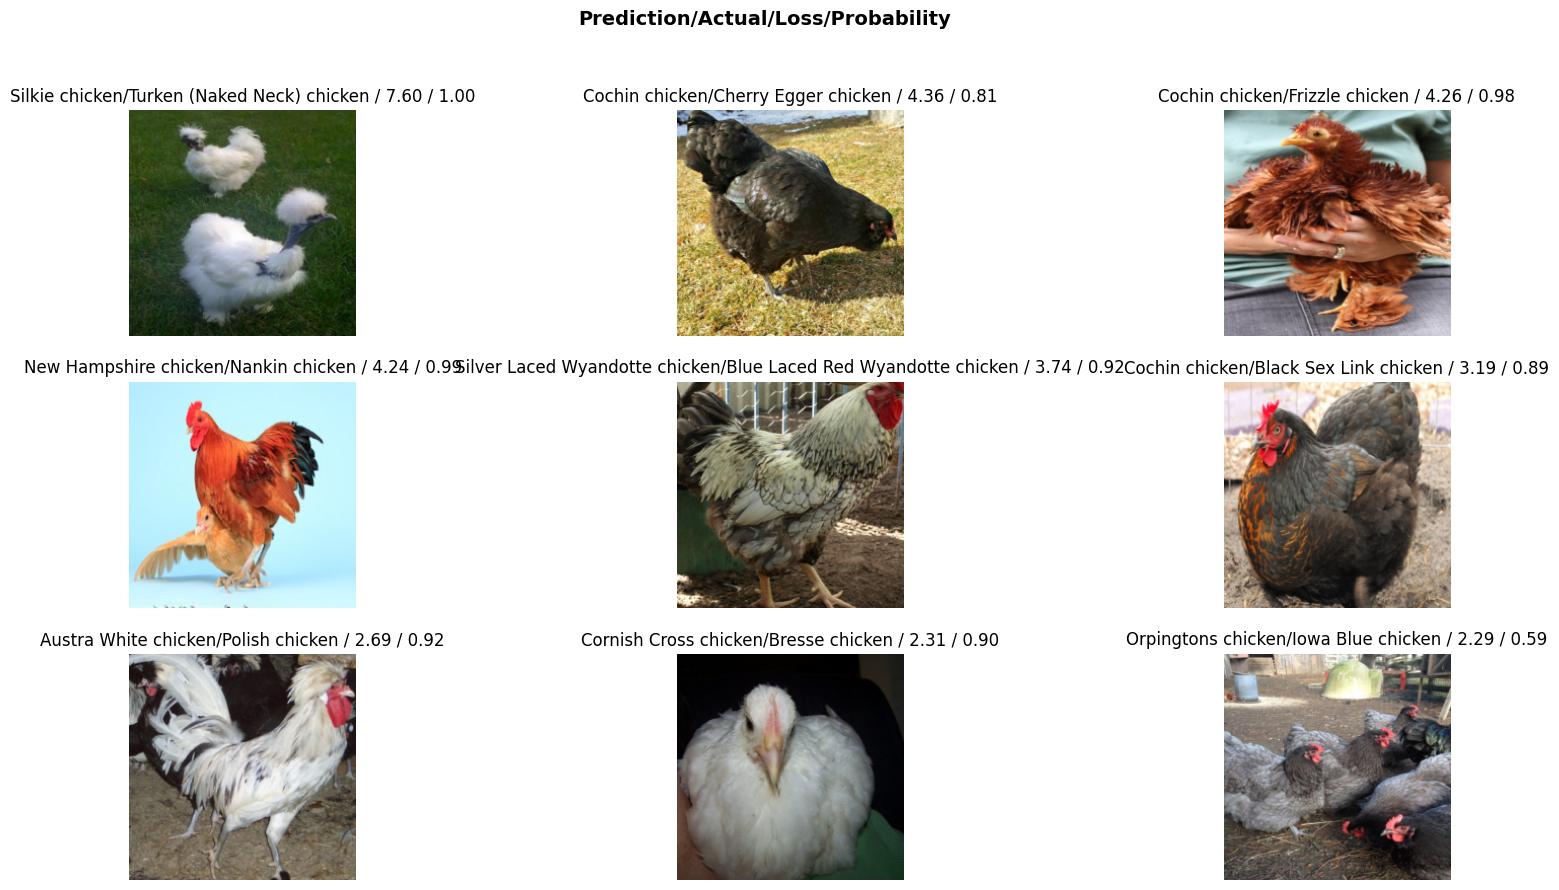

In [ ]:
interp.plot_top_losses(9, nrows=3, figsize=(20, 10))

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()   # delete the irrelevant data
for idx, categroy in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), f"{data_path}/category")

In [ ]:
model.export(f"chicken_breed_recognizer-v{version-1}.pkl")